In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
news_data = pd.read_csv('/content/NewspaperData.csv')
news_data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [ ]:
news_data.isnull().sum()

,0
Newspaper,0
daily,0
sunday,0


In [ ]:
news_data.dtypes

,0
Newspaper,object
daily,float64
sunday,float64


### Hypothesis

Ho:Sunday sell is not related to daily sell.

Ha:Sunday sell is related to daily sell.

### Assumption Test
Linearity test

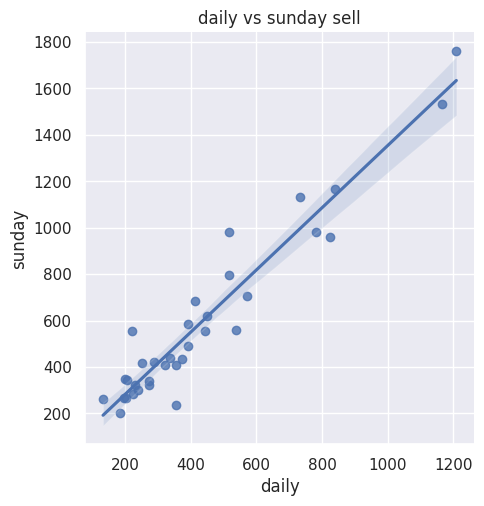

In [ ]:
sns.lmplot(x='daily', y='sunday',data=news_data)
plt.title("daily vs sunday sell")
plt.show()

### Normality Test

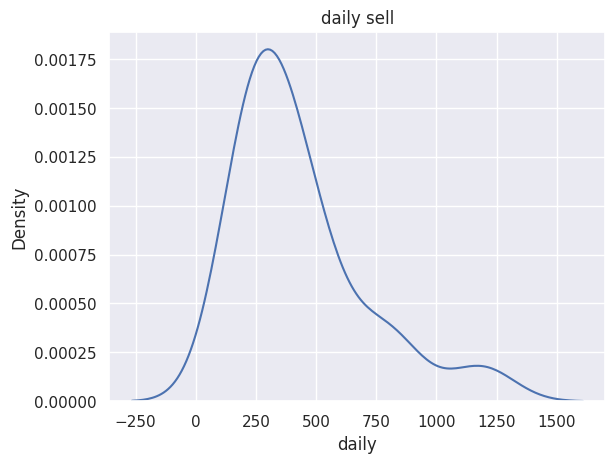

In [ ]:
sns.distplot(a=news_data['daily'],hist=False)
plt.title("daily sell")
plt.show()

In [ ]:
news_data['daily'].skew(), news_data['daily'].kurtosis()

(1.5321591323040094, 1.999034084097406)

### Here, We get near about normal bell shaped curve. Then depending upon the value of skewness(should be<3) and kurtosis(should be<3) pass normality test

In [ ]:
news_data1=news_data.drop(labels='Newspaper',axis=1)
news_data1.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


### Model Building

In [ ]:
import statsmodels.formula.api as smf

linear_model=smf.ols(formula='sunday~daily',data=news_data1)

### Model Training

In [ ]:
linear_model=linear_model.fit()
linear_model.params

,0
Intercept,13.835630
daily,1.339715


In [ ]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           6.02e-19
Time:                        08:09:58   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.7

### Model Testing

In [ ]:
x_test=pd.DataFrame( data={'daily':[300,250,585]})
x_test

,daily
0,300
1,250
2,585


### Manual Testing

y=13.8356+(1.3397*300)->415.74

y=13.8356+(1.3397*250)->348.76

y=13.8356+(1.3397*585)->797.56

### Automatic Calculation

In [ ]:
linear_model.predict(x_test)

,0
0,415.750057
1,348.764319
2,797.568763


In [ ]:
from pickle import dump
dump(linear_model,open('linear_intelligence.pkl','wb'))

In [ ]:
from pickle import load
loaded_lin_model = load(open('linear_intelligence.pkl','rb'))

In [ ]:
loaded_lin_model.predict(x_test)

,0
0,415.750057
1,348.764319
2,797.568763
